<a href="https://colab.research.google.com/github/Piyush434/Machine-Learning/blob/main/Review_2_Major_Project_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Analysis

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd

In [3]:
prkn = pd.DataFrame(pd.read_csv("/content/drive/My Drive/pd_speech_features.csv"))

In [4]:
nRow, nCol = prkn.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 756 rows and 755 columns


In [5]:
prkn.head(20)

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0    0       1  0.85247  0.71826  0.57227        240               239   
1    0       1  0.76686  0.69481  0.53966        234               233   
2    0       1  0.85083  0.67604  0.58982        232               231   
3    1       0  0.41121  0.79672  0.59257        178               177   
4    1       0  0.32790  0.79782  0.53028        236               235   
5    1       0  0.50780  0.78744  0.65451        226               221   
6    2       1  0.76095  0.62145  0.54543        322               321   
7    2       1  0.83671  0.62079  0.51179        318               317   
8    2       1  0.80826  0.61766  0.50447        318               317   
9    3       0  0.85302  0.62247  0.54855        493               492   
10   3       0  0.80657  0.67256  0.61745        488               487   
11   3       0  0.82653  0.58326  0.44555        498               497   
12   4       0  0.87260  0.78996  0.78026        492               491   
13   4       0  0.81148  0.76831  0.70809        305               304   
14   4       0  0.80978  0.77992  0.69180        291               290   
15   5       1  0.81471  0.61483  0.33216        300               299   
16   5       1  0.83269  0.62018  0.37051        286               285   
17   5       1  0.82016  0.63124  0.37031        266               265   
18   6       1  0.78067  0.66085  0.44583        283               282   
19   6       1  0.79774  0.71199  0.36714        289               288   

    meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0           0.008064            0.000087       0.00218  ...   
1           0.008258            0.000073       0.00195  ...   
2           0.008340            0.000060       0.00176  ...   
3           0.010858            0.000183       0.00419  ...   
4           0.008162            0.002669       0.00535  ...   
5           0.007631            0.002696       0.00783  ...   
6           0.005991            0.000107       0.00222  ...   
7           0.006074            0.000136       0.00282  ...   
8           0.006057            0.000069       0.00161  ...   
9           0.003910            0.000040       0.00075  ...   
10          0.003956            0.000054       0.00083  ...   
11          0.003873            0.000033       0.00069  ...   
12          0.003924            0.000067       0.00280  ...   
13          0.006316            0.003245       0.00341  ...   
14          0.006624            0.002757       0.00457  ...   
15          0.006433            0.000039       0.00085  ...   
16          0.006754            0.000052       0.00111  ...   
17          0.007257            0.000049       0.00086  ...   
18          0.006824            0.000138       0.00177  ...   
19          0.006693            0.000065       0.00122  ...   

    tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                      1.5620                     2.6445   
1                      1.5589                     3.6107   
2                      1.5643                     2.3308   
3                      3.7805                     3.5664   
4                      6.1727                     5.8416   
5                      4.8025                     5.0734   
6                    117.2678                    75.3156   
7                      3.8564                    11.8909   
8                      2.2640                     6.3993   
9                      1.6796                     2.0474   
10                     1.6542                     1.8437   
11                     1.6991                     1.8341   
12                     2.9478                     2.6633   
13                     3.8030                     3.0285   
14                     5.5630                     7.1639   
15                    72.2308                    65.8166   
16                     2.4817                     7.3621   
17                     1.7350                

In [6]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

<ipython-input-6-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


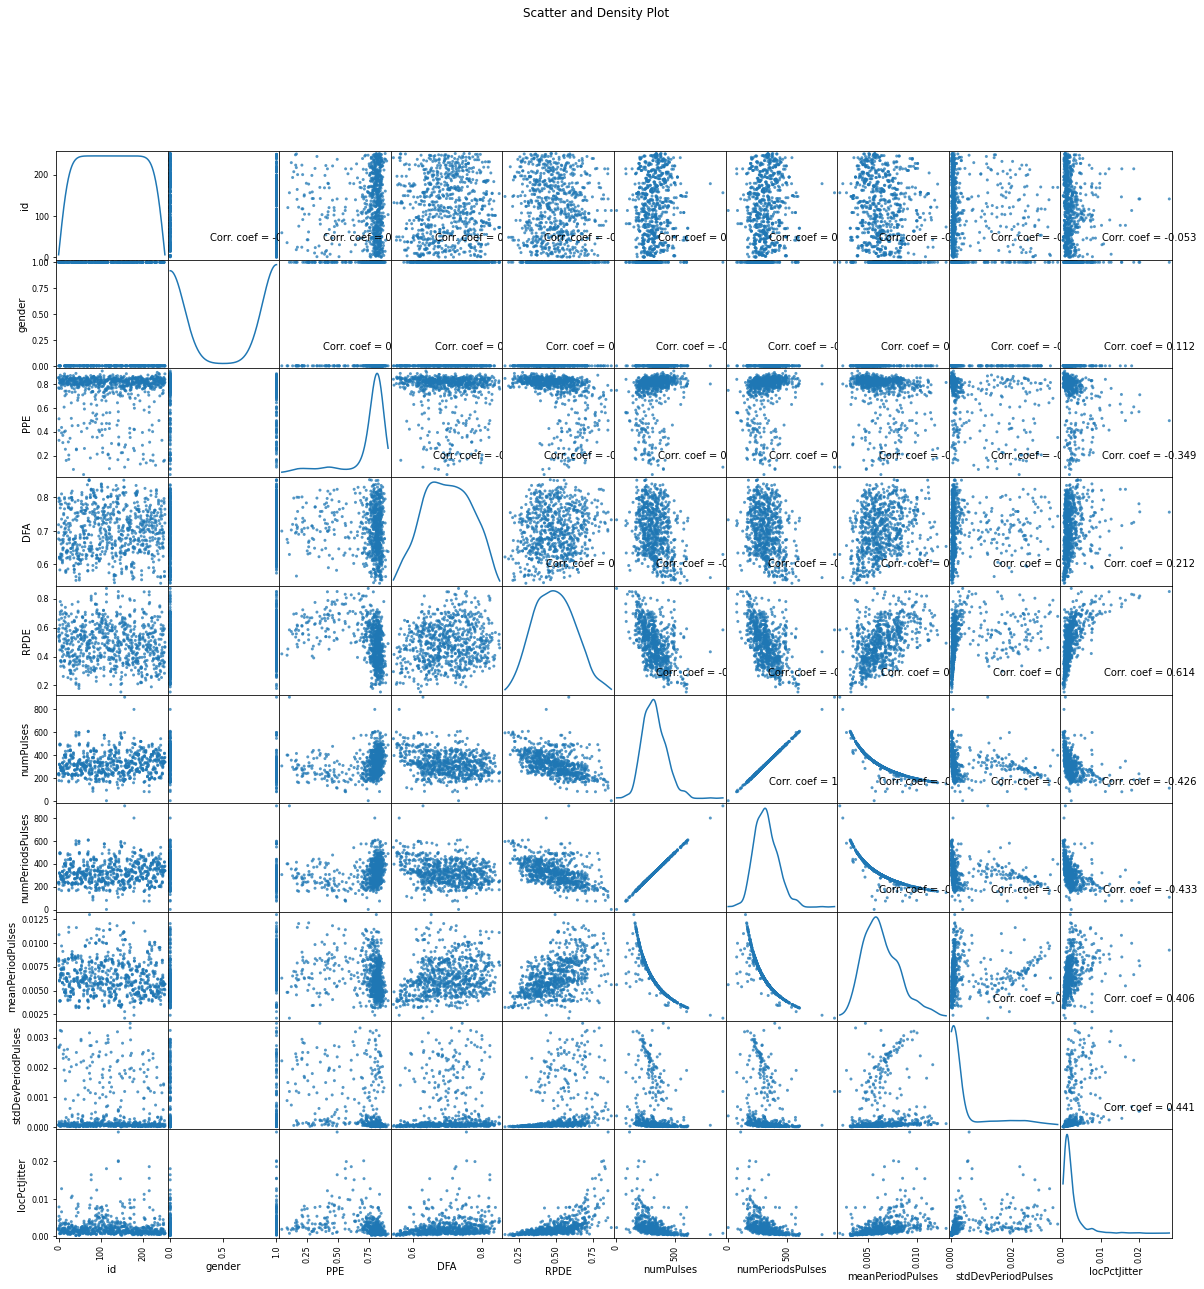

In [7]:
plotScatterMatrix(prkn, 20, 10)

In [8]:
prkn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [9]:
prkn.iloc[0:10,-1]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: class, dtype: int64

In [10]:
prkn.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

In [11]:
prkn['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# Features and Labels

In [12]:
X=prkn.iloc[:,:-1]
y=prkn.iloc[:,-1]

In [13]:
X.head()

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                     1.5466                     1.5620   
1                     1.5530                     1.5589   
2                     1.5399                     1.5643   
3                     6.9761                     3.7805   
4                     7.8832                     6.1727   

   tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
0                     2.6445                     3.8686   
1                     3.6107                    23.5155   
2                     2.3308                     9.4959   
3                     3.5664                     5.2558   
4                     5.8416                     6.0805   

   tqwt_kurtosisValue_dec_31  tqwt_kurtosisValue_dec_32  \
0                     4.2105                     5.1221   
1                    14.1962                    11.0261   
2                    10.7458                    11.0177   
3                    14.0403                     4.2235   
4                     5.7621                     7.7817   

   tqwt_kurtosisValue_dec_33  tqwt_kurtosisValue_dec_34  \
0                     4.4625                     2.6202   
1                     9.5082                     6.5245   
2                     4.8066                     2.9199   
3                     4.6857                     4.8460   
4                    11.6891                     8.2103   

   tqwt_kurtosisValue_dec_35  tqwt_kurtosisValue_dec_36  
0                     3.0004                    18.9405  
1                     6.3431                    45.1780  
2                     3.1495                     4.7666  
3                     6.2650                     4.0603  
4                     5.0559                     6.1164  

[5 rows x 754 columns]

In [14]:
X.iloc[:,2:].head()

PPE      DFA     RPDE  numPulses  numPeriodsPulses  meanPeriodPulses  \
0  0.85247  0.71826  0.57227        240               239          0.008064   
1  0.76686  0.69481  0.53966        234               233          0.008258   
2  0.85083  0.67604  0.58982        232               231          0.008340   
3  0.41121  0.79672  0.59257        178               177          0.010858   
4  0.32790  0.79782  0.53028        236               235          0.008162   

   stdDevPeriodPulses  locPctJitter  locAbsJitter  rapJitter  ...  \
0            0.000087       0.00218      0.000018    0.00067  ...   
1            0.000073       0.00195      0.000016    0.00052  ...   
2            0.000060       0.00176      0.000015    0.00057  ...   
3            0.000183       0.00419      0.000046    0.00149  ...   
4            0.002669       0.00535      0.000044    0.00166  ...   

   tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                     1.5466                     1.5620   
1                     1.5530                     1.5589   
2                     1.5399                     1.5643   
3                     6.9761                     3.7805   
4                     7.8832                     6.1727   

   tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
0                     2.6445                     3.8686   
1                     3.6107                    23.5155   
2                     2.3308                     9.4959   
3                     3.5664                     5.2558   
4                     5.8416                     6.0805   

   tqwt_kurtosisValue_dec_31  tqwt_kurtosisValue_dec_32  \
0                     4.2105                     5.1221   
1                    14.1962                    11.0261   
2                    10.7458                    11.0177   
3                    14.0403                     4.2235   
4                     5.7621                     7.7817   

   tqwt_kurtosisValue_dec_33  tqwt_kurtosisValue_dec_34  \
0                     4.4625                     2.6202   
1                     9.5082                     6.5245   
2                     4.8066                     2.9199   
3                     4.6857                     4.8460   
4                    11.6891                     8.2103   

   tqwt_kurtosisValue_dec_35  tqwt_kurtosisValue_dec_36  
0                     3.0004                    18.9405  
1                     6.3431                    45.1780  
2                     3.1495                     4.7666  
3                     6.2650                     4.0603  
4                     5.0559                     6.1164  

[5 rows x 752 columns]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,2:]=scaler.fit_transform(X.iloc[:,2:])

In [16]:
X.head()

id  gender       PPE       DFA      RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.936278  0.565310  0.583000   0.262983          0.263274   
1   0       1  0.837434  0.489455  0.537514   0.256354          0.256637   
2   0       1  0.934385  0.428738  0.607479   0.254144          0.254425   
3   1       0  0.426804  0.819111  0.611315   0.194475          0.194690   
4   1       0  0.330615  0.822669  0.524431   0.258564          0.258850   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.548552            0.021947      0.071532  ...   
1          0.566485            0.018001      0.063181  ...   
2          0.573975            0.014344      0.056282  ...   
3          0.805881            0.049580      0.144517  ...   
4          0.557581            0.765643      0.186638  ...   

   tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                   0.000576                   0.000219   
1                   0.000594                   0.000206   
2                   0.000557                   0.000229   
3                   0.015906                   0.009530   
4                   0.018467                   0.019569   

   tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
0                   0.005515                   0.019054   
1                   0.010303                   0.182833   
2                   0.003960                   0.065964   
3                   0.010084                   0.030618   
4                   0.021359                   0.037492   

   tqwt_kurtosisValue_dec_31  tqwt_kurtosisValue_dec_32  \
0                   0.024520                   0.039777   
1                   0.123920                   0.110245   
2                   0.089574                   0.110145   
3                   0.122368                   0.029052   
4                   0.039965                   0.071521   

   tqwt_kurtosisValue_dec_33  tqwt_kurtosisValue_dec_34  \
0                   0.039411                   0.012611   
1                   0.109584                   0.077525   
2                   0.044197                   0.017594   
3                   0.042515                   0.049618   
4                   0.139915                   0.105554   

   tqwt_kurtosisValue_dec_35  tqwt_kurtosisValue_dec_36  
0                   0.018790                   0.107598  
1                   0.078923                   0.277905  
2                   0.021472                   0.015595  
3                   0.077518                   0.011011  
4                   0.055767                   0.024357  

[5 rows x 754 columns]

# Feature Importance and Selection

In [17]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [18]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [19]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(150,'Score'))

                         Feature       Score
0                             id  397.462037
743    tqwt_kurtosisValue_dec_26   30.911696
744    tqwt_kurtosisValue_dec_27   25.009273
368  tqwt_entropy_shannon_dec_11   20.991448
333           tqwt_energy_dec_12   19.638662
..                           ...         ...
10                  locAbsJitter    3.691708
471          tqwt_TKEO_std_dec_6    3.683707
4                           RPDE    3.638598
679         tqwt_maxValue_dec_34    3.636157
723     tqwt_kurtosisValue_dec_6    3.630727

[150 rows x 2 columns]


In [20]:
selected_features=featureScores.nlargest(150,'Score')['Feature']

In [21]:
X[selected_features].head()

id  tqwt_kurtosisValue_dec_26  tqwt_kurtosisValue_dec_27  \
0   0                   0.000313                   0.000576   
1   0                   0.000241                   0.000594   
2   0                   0.000279                   0.000557   
3   1                   0.001017                   0.015906   
4   1                   0.001015                   0.018467   

   tqwt_entropy_shannon_dec_11  tqwt_energy_dec_12  \
0                     0.007532            0.002224   
1                     0.007476            0.002807   
2                     0.003058            0.002310   
3                     0.004941            0.006898   
4                     0.004188            0.006338   

   tqwt_entropy_shannon_dec_16  tqwt_stdValue_dec_11  \
0                     0.100223              0.052966   
1                     0.086438              0.053197   
2                     0.053661              0.031539   
3                     0.342319              0.046091   
4                     0.361451              0.039795   

   tqwt_entropy_shannon_dec_15  tqwt_kurtosisValue_dec_28  \
0                     0.082589                   0.000219   
1                     0.066563                   0.000206   
2                     0.040071                   0.000229   
3                     0.270988                   0.009530   
4                     0.306133                   0.019569   

   tqwt_TKEO_std_dec_12  ...  ppq5Jitter  tqwt_kurtosisValue_dec_33  \
0              0.001153  ...    0.067871                   0.039411   
1              0.003310  ...    0.058566                   0.109584   
2              0.000410  ...    0.058019                   0.044197   
3              0.009637  ...    0.143952                   0.042515   
4              0.006414  ...    0.121511                   0.139915   

   tqwt_minValue_dec_14  locPctJitter  tqwt_TKEO_std_dec_8  locAbsJitter  \
0              0.906152      0.071532             0.002366      0.066124   
1              0.912409      0.063181             0.002170      0.060259   
2              0.929719      0.056282             0.000759      0.054786   
3              0.481933      0.144517             0.006733      0.175196   
4              0.553449      0.186638             0.004707      0.168159   

   tqwt_TKEO_std_dec_6      RPDE  tqwt_maxValue_dec_34  \
0             0.000085  0.583000              0.004263   
1             0.000734  0.537514              0.009356   
2             0.000037  0.607479              0.006237   
3             0.001929  0.611315              0.117797   
4             0.000720  0.524431              0.098703   

   tqwt_kurtosisValue_dec_6  
0                  0.000782  
1                  0.165225  
2                  0.000999  
3                  0.012545  
4                  0.001072  

[5 rows x 150 columns]

#Train and Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.33, random_state=42)

#Testing inbuild model

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf1 = SVC(gamma='auto').fit(X_train, y_train)

y_pred1=clf1.predict(X_test)

accuracy_score(y_test, y_pred1)

0.724

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

y_pred2=clf2.predict(X_test)


accuracy_score(y_test, y_pred2)

0.804

In [25]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train, y_train)

y_pred3=clf3.predict(X_test)

accuracy_score(y_test, y_pred3)

0.804

In [26]:
from sklearn.metrics import f1_score,recall_score,precision_score

comp=pd.DataFrame({'Models':['SVM','Decision Classifier', 
                             'Random Forest Regressor'],
                   
                   'Accuracy ':[accuracy_score(y_test, y_pred1)*100,
                                accuracy_score(y_test, y_pred2)*100,
                               accuracy_score(y_test, y_pred3)*100],
                   'F1 Score':[f1_score(y_test, y_pred1),
                                 f1_score(y_test, y_pred2),
                                 f1_score(y_test, y_pred3)
                                  ],
                  'Recall':[recall_score(y_test, y_pred1),
                                 recall_score(y_test, y_pred2),
                                 recall_score(y_test, y_pred3)
                                  ],
                  'Precision':[precision_score(y_test, y_pred1),
                                 precision_score(y_test, y_pred2),
                                 precision_score(y_test, y_pred3)
                                  ]} )

In [27]:
comp

Models  Accuracy   F1 Score    Recall  Precision
0                      SVM       72.4  0.839907  1.000000   0.724000
1      Decision Classifier       80.4  0.866485  0.878453   0.854839
2  Random Forest Regressor       80.4  0.879012  0.983425   0.794643

In [28]:
y_test_prev = y_test

## Decision Tree Classfier from Scratch


# Entropy

In [29]:
import pandas as pd
import numpy as np

def entropy(feature):
    val = feature.value_counts()/feature.shape[0]
    # calculating the entropy
    entropy = np.sum(-val*np.log2(val+1e-9))
    return entropy

In [30]:
# let's test with the numPulses column
dt = pd.read_csv("/content/drive/My Drive/pd_speech_features.csv")
entropy(dt["numPulses"])

8.016369821704405

# Gini Impurity

In [31]:
def gini_impurity(feature):
    p = feature.value_counts()/feature.shape[0]
    # applying the ginin index formula
    gini_index = 1-np.sum(p**2)
    return gini_index

In [32]:
#titanic dataset's Gender column
gini_impurity(dt["numPulses"])

0.9954158618179783

# Information Gain

In [33]:
def information_gain(feature, mask):
    sum_a = sum(mask)
    b = mask.shape[0] - sum_a
    if(sum_a == 0 or b ==0): 
        information_g = 0
    else:
        if feature.dtypes != 'O':
            information_g = feature.var() - (sum_a/(sum_a+b)* feature[mask]).var() - (b/(sum_a+b)*feature[-mask]).var()
        else:
            information_g = entropy(feature)-sum_a/(sum_a+b)*entropy(feature[mask])-b/(sum_a+b)*entropy(feature[-mask])
    return information_g

In [34]:
print(information_gain(dt['numPulses'], dt["class"] == 1))
print(information_gain(dt['numPulses'], dt["class"] == 0))

4768.806861381406
4768.806861381406


In [35]:
from collections import Counter
import numpy as np

class decision_Tree:
  
    def __init__(self):
        self.no_of_unique=6 
        self.counter=0 
        self.min_samples=15 
        self.max_depth=10 
  
    def type_of_cols(self,data):

        col_type=[]
        for col in data.columns[:-1]:
            no_of_col_unique= data[col].nunique()
            if data[col].dtypes==object or no_of_col_unique < self.no_of_unique:
                col_type.append("categorical")
            else:
                col_type.append("continuous")
        return col_type

    def get_splits(self,data):
        splits = {} 
        feature_type=self.type_of_cols(data) 

        for column_index in range(data.shape[1]-1):          
        
            values = data.iloc[:, column_index] 
            unique_values = np.unique(values) 
            type_of_feature = feature_type[column_index] 

            if type_of_feature == "continuous":
                splits[column_index] = []
                for index in range(len(unique_values)):
                    if index != 0:
                        current_value = unique_values[index]
                        previous_value = unique_values[index - 1]
                        split = (current_value + previous_value) / 2 
                        splits[column_index].append(split) 

            elif len(unique_values) > 1:
                splits[column_index] = unique_values
    
        return splits
    def split_data(self,data, column, value):

        feature_type=self.type_of_cols(data)
        split_values = data.iloc[:,column]
        type_of_feature = feature_type[column]
        if type_of_feature == "continuous": 
            left = data[split_values <= value]
            right = data[split_values >  value]
        else:
            left = data[split_values == value]
            right = data[split_values != value]
    
        return left,right
    def entropy(self,data):
        prob=list(dict(data.iloc[:, -1].value_counts(normalize=True)).values())
        entropy = sum(prob* -np.log2(prob))    
        return entropy
    def entropy_data(self,left,right):    
        n = len(left) + len(right)
        p_left = len(left) / n
        p_right = len(right) / n
        entropy_ =  (p_left * self.entropy(left)+ p_right *self.entropy(right))
        return entropy_

    def best_split(self,data,splits):
        
        entropy = 99999
       
        for col in splits: 
            for val in splits[col]: 
                left, right = self.split_data(data, column=col, value=val)
                current_entropy = self.entropy_data(left,right) 
                if current_entropy <= entropy:  
                    entropy = current_entropy 
                    best_column = col 
                    best_split = val
        return best_column, best_split
  
    def _tree_builder(self,df):
        column=df.columns 
        feature_type=self.type_of_cols(df) 
        data = df
        

        if  (df.iloc[:,-1].nunique()==1) or (len(data) < self.min_samples) or (self.counter == self.max_depth):
            classes= Counter(df.iloc[:,-1]).most_common(1)[0][0]
            return classes
        else:    
            self.counter += 1
            splits = self.get_splits(data)
            split_column, split_value = self.best_split(data,splits)
            left, right = self.split_data(data, split_column, split_value) 
            
            
            feature_name = column[split_column] 
            type_of_feature = feature_type[split_column] 
            if type_of_feature == "continuous":
                question = "{} <= {}".format(feature_name, split_value) 
            else:
                question = "{} = {}".format(feature_name, split_value)
          
            mytree = {question: []}
            ans_yes = self._tree_builder(left) 
            ans_no = self._tree_builder(right) 

            if ans_yes == ans_no:
                mytree = ans_yes
            else:
                mytree[question].append(ans_yes)
                mytree[question].append(ans_no)

            return mytree
    def fit(self,X,y):
        X["output"]=y

        self.tree=self._tree_builder(X)
        return self.tree

    def _predict(sf,dx,tree):
        root_node = list(tree.keys())[0] 
        column,operator,split=root_node.split(" ") 
        if operator == "<=": 
            if dx[column] <= float(split):
                result = tree[root_node][0]
            else:
                result = tree[root_node][1]

        else:
            if str(dx[column]) == split:
                result = tree[root_node][0]
            else:
                result = tree[root_node][1]
        
        if type(result)!=dict: 
            return result
       
        else:
            return sf._predict(dx,result)


    def predict(self,X_test):
        s=[] 
        
        for i in range(X_test.shape[0]):
            s.append(self._predict(X_test.iloc[i],self.tree))
        return s

# Applying on Dataset





In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dt.head()

id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.85247  0.71826  0.57227        240               239   
1   0       1  0.76686  0.69481  0.53966        234               233   
2   0       1  0.85083  0.67604  0.58982        232               231   
3   1       0  0.41121  0.79672  0.59257        178               177   
4   1       0  0.32790  0.79782  0.53028        236               235   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.008064            0.000087       0.00218  ...   
1          0.008258            0.000073       0.00195  ...   
2          0.008340            0.000060       0.00176  ...   
3          0.010858            0.000183       0.00419  ...   
4          0.008162            0.002669       0.00535  ...   

   tqwt_kurtosisValue_dec_28  tqwt_kurtosisValue_dec_29  \
0                     1.5620                     2.6445   
1                     1.5589                     3.6107   
2                     1.5643                     2.3308   
3                     3.7805                     3.5664   
4                     6.1727                     5.8416   

   tqwt_kurtosisValue_dec_30  tqwt_kurtosisValue_dec_31  \
0                     3.8686                     4.2105   
1                    23.5155                    14.1962   
2                     9.4959                    10.7458   
3                     5.2558                    14.0403   
4                     6.0805                     5.7621   

   tqwt_kurtosisValue_dec_32  tqwt_kurtosisValue_dec_33  \
0                     5.1221                     4.4625   
1                    11.0261                     9.5082   
2                    11.0177                     4.8066   
3                     4.2235                     4.6857   
4                     7.7817                    11.6891   

   tqwt_kurtosisValue_dec_34  tqwt_kurtosisValue_dec_35  \
0                     2.6202                     3.0004   
1                     6.5245                     6.3431   
2                     2.9199                     3.1495   
3                     4.8460                     6.2650   
4                     8.2103                     5.0559   

   tqwt_kurtosisValue_dec_36  class  
0                    18.9405      1  
1                    45.1780      1  
2                     4.7666      1  
3                     4.0603      1  
4                     6.1164      1  

[5 rows x 755 columns]

In [38]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [39]:
msno.bar(dt) # nullity by column
plt.show()

## Features and labels

In [40]:
X=dt.iloc[:,:-1]
y=dt.iloc[:,-1]

In [41]:
X.iloc[:,2:].head()

PPE      DFA     RPDE  numPulses  numPeriodsPulses  meanPeriodPulses  \
0  0.85247  0.71826  0.57227        240               239          0.008064   
1  0.76686  0.69481  0.53966        234               233          0.008258   
2  0.85083  0.67604  0.58982        232               231          0.008340   
3  0.41121  0.79672  0.59257        178               177          0.010858   
4  0.32790  0.79782  0.53028        236               235          0.008162   

   stdDevPeriodPulses  locPctJitter  locAbsJitter  rapJitter  ...  \
0            0.000087       0.00218      0.000018    0.00067  ...   
1            0.000073       0.00195      0.000016    0.00052  ...   
2            0.000060       0.00176      0.000015    0.00057  ...   
3            0.000183       0.00419      0.000046    0.00149  ...   
4            0.002669       0.00535      0.000044    0.00166  ...   

   tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                     1.5466                     1.5620   
1                     1.5530                     1.5589   
2                     1.5399                     1.5643   
3                     6.9761                     3.7805   
4                     7.8832                     6.1727   

   tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
0                     2.6445                     3.8686   
1                     3.6107                    23.5155   
2                     2.3308                     9.4959   
3                     3.5664                     5.2558   
4                     5.8416                     6.0805   

   tqwt_kurtosisValue_dec_31  tqwt_kurtosisValue_dec_32  \
0                     4.2105                     5.1221   
1                    14.1962                    11.0261   
2                    10.7458                    11.0177   
3                    14.0403                     4.2235   
4                     5.7621                     7.7817   

   tqwt_kurtosisValue_dec_33  tqwt_kurtosisValue_dec_34  \
0                     4.4625                     2.6202   
1                     9.5082                     6.5245   
2                     4.8066                     2.9199   
3                     4.6857                     4.8460   
4                    11.6891                     8.2103   

   tqwt_kurtosisValue_dec_35  tqwt_kurtosisValue_dec_36  
0                     3.0004                    18.9405  
1                     6.3431                    45.1780  
2                     3.1495                     4.7666  
3                     6.2650                     4.0603  
4                     5.0559                     6.1164  

[5 rows x 752 columns]

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X.iloc[:,2:]=scaler.fit_transform(X.iloc[:,2:])

In [43]:
X.head()

id  gender       PPE       DFA      RPDE  numPulses  numPeriodsPulses  \
0   0       1  0.936278  0.565310  0.583000   0.262983          0.263274   
1   0       1  0.837434  0.489455  0.537514   0.256354          0.256637   
2   0       1  0.934385  0.428738  0.607479   0.254144          0.254425   
3   1       0  0.426804  0.819111  0.611315   0.194475          0.194690   
4   1       0  0.330615  0.822669  0.524431   0.258564          0.258850   

   meanPeriodPulses  stdDevPeriodPulses  locPctJitter  ...  \
0          0.548552            0.021947      0.071532  ...   
1          0.566485            0.018001      0.063181  ...   
2          0.573975            0.014344      0.056282  ...   
3          0.805881            0.049580      0.144517  ...   
4          0.557581            0.765643      0.186638  ...   

   tqwt_kurtosisValue_dec_27  tqwt_kurtosisValue_dec_28  \
0                   0.000576                   0.000219   
1                   0.000594                   0.000206   
2                   0.000557                   0.000229   
3                   0.015906                   0.009530   
4                   0.018467                   0.019569   

   tqwt_kurtosisValue_dec_29  tqwt_kurtosisValue_dec_30  \
0                   0.005515                   0.019054   
1                   0.010303                   0.182833   
2                   0.003960                   0.065964   
3                   0.010084                   0.030618   
4                   0.021359                   0.037492   

   tqwt_kurtosisValue_dec_31  tqwt_kurtosisValue_dec_32  \
0                   0.024520                   0.039777   
1                   0.123920                   0.110245   
2                   0.089574                   0.110145   
3                   0.122368                   0.029052   
4                   0.039965                   0.071521   

   tqwt_kurtosisValue_dec_33  tqwt_kurtosisValue_dec_34  \
0                   0.039411                   0.012611   
1                   0.109584                   0.077525   
2                   0.044197                   0.017594   
3                   0.042515                   0.049618   
4                   0.139915                   0.105554   

   tqwt_kurtosisValue_dec_35  tqwt_kurtosisValue_dec_36  
0                   0.018790                   0.107598  
1                   0.078923                   0.277905  
2                   0.021472                   0.015595  
3                   0.077518                   0.011011  
4                   0.055767                   0.024357  

[5 rows x 754 columns]

## Feature Importance and Selection

In [44]:
from sklearn.feature_selection import SelectKBest,chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)

In [45]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [46]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
print(featureScores.nlargest(20,'Score'))

                         Feature       Score
0                             id  397.462037
743    tqwt_kurtosisValue_dec_26   30.911696
744    tqwt_kurtosisValue_dec_27   25.009273
368  tqwt_entropy_shannon_dec_11   20.991448
333           tqwt_energy_dec_12   19.638662
373  tqwt_entropy_shannon_dec_16   19.357413
584         tqwt_stdValue_dec_11   17.729363
372  tqwt_entropy_shannon_dec_15   17.064740
745    tqwt_kurtosisValue_dec_28   16.638407
477         tqwt_TKEO_std_dec_12   15.890207
753    tqwt_kurtosisValue_dec_36   15.442829
440        tqwt_TKEO_mean_dec_11   15.407581
476         tqwt_TKEO_std_dec_11   15.338395
370  tqwt_entropy_shannon_dec_13   14.817812
371  tqwt_entropy_shannon_dec_14   14.594928
585         tqwt_stdValue_dec_12   14.435020
334           tqwt_energy_dec_13   14.432312
657         tqwt_maxValue_dec_12   14.337267
656         tqwt_maxValue_dec_11   13.923499
742    tqwt_kurtosisValue_dec_25   13.823581


In [47]:
selected_features=featureScores.nlargest(20,'Score')['Feature']

## Train Split

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.33, random_state=42)

## Applying Decison Tree

In [49]:
ob = decision_Tree()
ob.fit(X_train,y_train,)
print(ob.tree)

{'tqwt_kurtosisValue_dec_36 <= 0.14965691871397907': [{'tqwt_stdValue_dec_11 <= 0.4067330981848699': [{'tqwt_kurtosisValue_dec_27 <= 0.2614870286701373': [{'tqwt_TKEO_mean_dec_11 <= 0.002423180549270185': [1, {'tqwt_kurtosisValue_dec_26 <= 0.2012146030635347': [{'tqwt_kurtosisValue_dec_36 <= 0.12942093227495577': [{'tqwt_energy_dec_13 <= 0.00560140100999025': [0, {'tqwt_entropy_shannon_dec_16 <= 0.19050271765331478': [1, {'tqwt_TKEO_std_dec_11 <= 0.005492122424555107': [0, 1]}]}]}, 0]}, 0]}]}, 0]}, 0]}, 1]}


              precision    recall  f1-score   support

           0       0.65      0.46      0.54        69
           1       0.82      0.91      0.86       181

    accuracy                           0.78       250
   macro avg       0.73      0.68      0.70       250
weighted avg       0.77      0.78      0.77       250



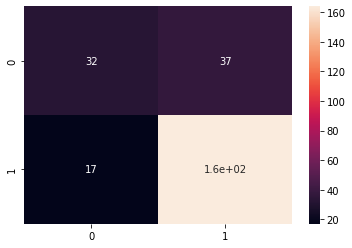

In [50]:
y_pred = ob.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)

print(classification_report(y_test,y_pred))

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, y_pred)

0.784

## Compairing with Sklearn Decision Tree

              precision    recall  f1-score   support

           0       0.66      0.61      0.63        69
           1       0.85      0.88      0.87       181

    accuracy                           0.80       250
   macro avg       0.76      0.74      0.75       250
weighted avg       0.80      0.80      0.80       250



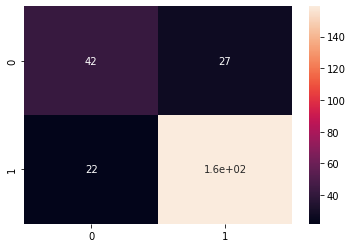

In [53]:
cf_matrix = confusion_matrix(y_test_prev, y_pred2)
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test_prev,y_pred2))

## Compairing with Sklearn SVM

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        69
           1       0.72      1.00      0.84       181

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.61       250



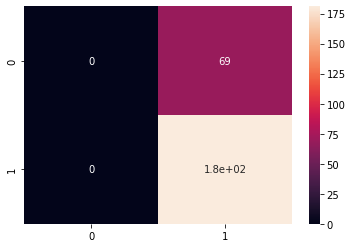

In [54]:
cf_matrix = confusion_matrix(y_test_prev, y_pred1)
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test_prev,y_pred1))

## Compairing with Random Forest

              precision    recall  f1-score   support

           0       0.88      0.33      0.48        69
           1       0.79      0.98      0.88       181

    accuracy                           0.80       250
   macro avg       0.84      0.66      0.68       250
weighted avg       0.82      0.80      0.77       250



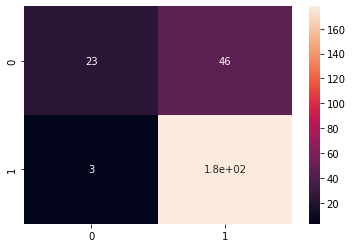

In [55]:
cf_matrix = confusion_matrix(y_test_prev, y_pred3)
sns.heatmap(cf_matrix, annot=True)
print(classification_report(y_test_prev,y_pred3))

In [56]:
comp2=pd.DataFrame({'Models':['SVM','Decision Classifier', 
                             'Random Forest Regressor','Decision Tree From Scratch'],
                   
                   'Accuracy ':[accuracy_score(y_test_prev, y_pred1)*100,
                                accuracy_score(y_test_prev, y_pred2)*100,
                               accuracy_score(y_test_prev, y_pred3)*100,
                                accuracy_score(y_test, y_pred)*100],
                   'F1 Score':[f1_score(y_test_prev, y_pred1),
                                 f1_score(y_test_prev, y_pred2),
                                 f1_score(y_test_prev, y_pred3),
                                  f1_score(y_test, y_pred)
                                  ],
                  'Recall':[recall_score(y_test_prev, y_pred1),
                                 recall_score(y_test_prev, y_pred2),
                                 recall_score(y_test_prev, y_pred3),
                                recall_score(y_test, y_pred)
                                  ],
                  'Precision':[precision_score(y_test_prev, y_pred1),
                                 precision_score(y_test_prev, y_pred2),
                                 precision_score(y_test_prev, y_pred3),
                                 precision_score(y_test, y_pred)
                                  ]} )

In [57]:
comp2

Models  Accuracy   F1 Score    Recall  Precision
0                         SVM       72.4  0.839907  1.000000   0.724000
1         Decision Classifier       80.4  0.866485  0.878453   0.854839
2     Random Forest Regressor       80.4  0.879012  0.983425   0.794643
3  Decision Tree From Scratch       78.4  0.858639  0.906077   0.815920

## SVM


In [58]:
class SVM:
    def __init__(self, iterations=1000, lr=0.01, lambdaa=0.01):
        self.lambdaa = lambdaa
        self.iterations = iterations
        self.lr = lr
        self.w = None
        self.b = None
    def initialize_parameters(self,X):

        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0
    def gradient_descent(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        for i, x in enumerate(X):
            if y_[i] * (np.dot(x, self.w) - self.b) >= 1:
                dw = 2 * self.lambdaa * self.w
                db = 0
            else:
                dw = 2 * self.lambdaa * self.w - np.dot(x, y_[i])
                db = y_[i]

            self.update_parameters(dw,db)
    def update_parameters(self, dw, db):
        
        self.w = self.w - self.lr * dw
        self.b = self.b - self.lr * db
    def fit(self, X, y):
        self.initialize_parameters(X)
        for i in range(self.iterations):
            self.gradient_descent(X,y)
    def predict(self, X):
        output = np.dot(X, self.w) - self.b
        label_signs = np.sign(output)
        predictions = np.where(label_signs <= -1, 0, 1)
        return predictions

In [59]:
X_train.shape
X_train.iloc[:,-1:]
X_train = X_train.iloc[: , :-1]

In [60]:
clf = SVM()
# clf.init()
clf.fit(X_train.to_numpy(), y_train.to_numpy())

In [61]:
X_train.shape


(506, 20)

In [62]:
X_test.shape

(250, 20)

In [63]:
y_test_predicted = clf.predict(X_test.to_numpy())

In [64]:
print("accuracy on test dataset: {}".format(accuracy_score(y_test.to_numpy(), y_test_predicted)))


accuracy on test dataset: 0.724
